**Matplotlib – Quick start guide**

This tutorial covers [basic use](https://matplotlib.org/stable/tutorials/introductory/quick_start.html) and some advanced technique from [Aurélien Géron's](https://colab.research.google.com/github/ageron/handson-ml3/blob/main/tools_matplotlib.ipynb#scrollTo=z57tzooJqLKu) and [Wes McKinney's](https://wesmckinney.com/book/plotting-and-visualization.html) books.

First of all, we need to import the packages required to run this notebook, but you can also do this on the fly:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
import numpy as np
import pandas as pd
from copy import deepcopy


# Pathways
from pathlib import Path
import pandas as pd
import urllib.request

# Enable grids on all plots and setting up a nice configuration
plt.rc('figure', figsize=(8, 5))
# plt.rc('figure', figsize=(16, 10))
# plt.rc('figure', figsize=(32, 20))
plt.rc('font', family='monospace', weight='bold', size=11)
plt.rc('axes', labelsize=11, titlesize=14)
plt.rc('legend', fontsize=11)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rcParams['axes.grid'] = True
plt.rcParams['lines.linewidth'] = 2

# Statistics & modeling
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error

In a Jupyter notebook, you need to import `import matplotlib.pyplot` to automatically register Jupyter itself as a backend, so the graphs show up directly within the notebook. It used to require running `%matplotlib inline` or `%matplotlib notebook` or even `%matplotlib` in IPython, so you'll still see it in some notebooks, but it's not needed anymore. This will allow you to display the plot directly below the code cell that produced it.

**Note**: In Jupyter Notebook, you don’t need to use `plt.show()` to display the plot. If you are not using `%matplotlib inline`, then you will need to use `plt.show()` to display the plot.

## Functions for Matplotlib figures

In [3]:
# Extra code – code to save the figures as high-res PNGs for the book
IMAGES_PATH = Path() / "img"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig_png(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """This function saves a figure to a file in the IMAGES_PATH directory.

    Args:
        fig_id (_type_): this parameter identifies and saves in the format specified by `fig_extension` parameter.
        tight_layout (bool, optional): this parameter will make sure the function will adjust the subplot parameters to give specified padding. Defaults to True.
        fig_extension (str, optional): _description_. Defaults to "png".
        resolution (int, optional): this parameter specifies the resolution of the saved inmage in dots per inch. Defaults to 300.
    """
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def save_fig_eps(fig_id, tight_layout=True, fig_extension="eps"):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension)

## Draw a first plot

Here a minimal example plot:

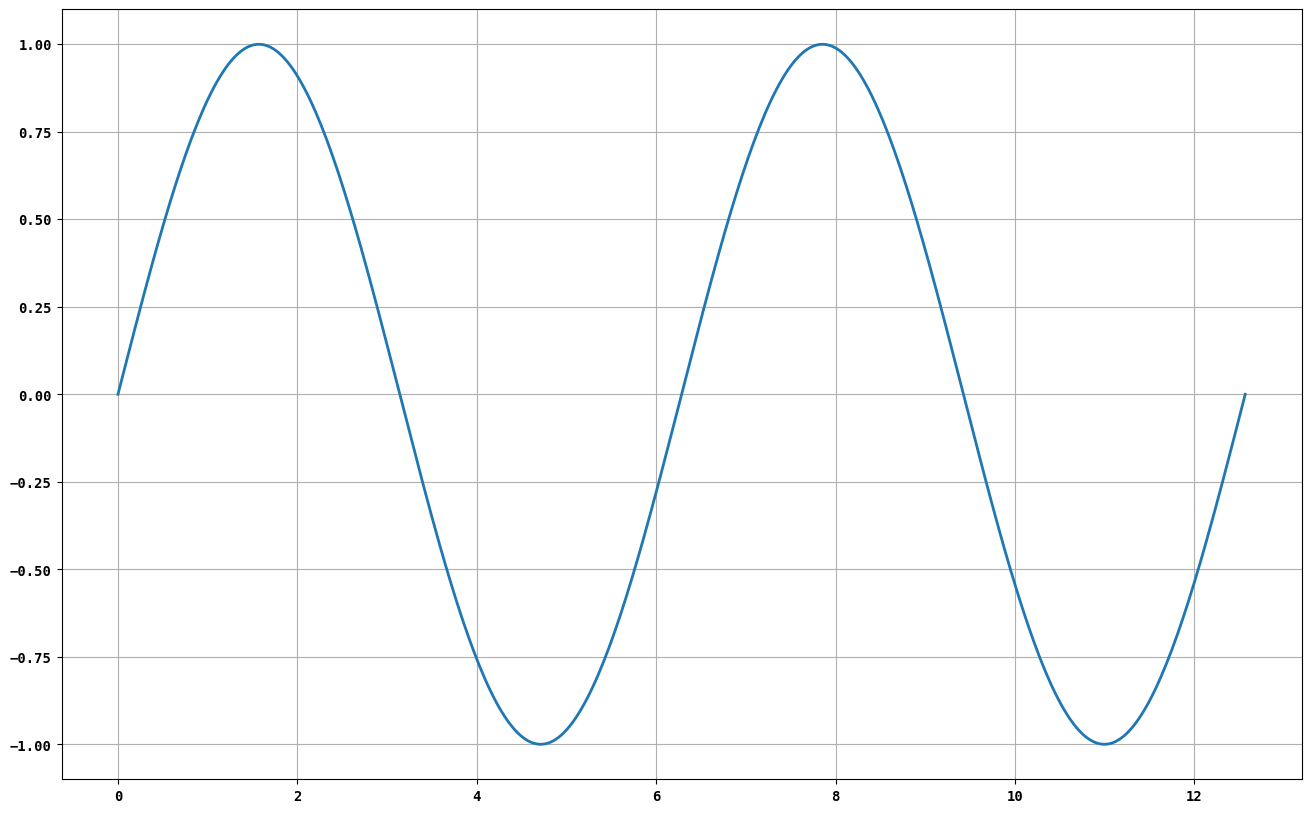

In [4]:
x = np.linspace(0, 4*np.pi, 400)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

## A simple example

Figures can contain one or more `Axes`, which are areas where points can be specified in terms of x-y coordinates. The simplest way of creating a `Figure` with `Axes` is using `plt.subplots` and then using `Axes.plot` to draw some data on the Axes, as follows:

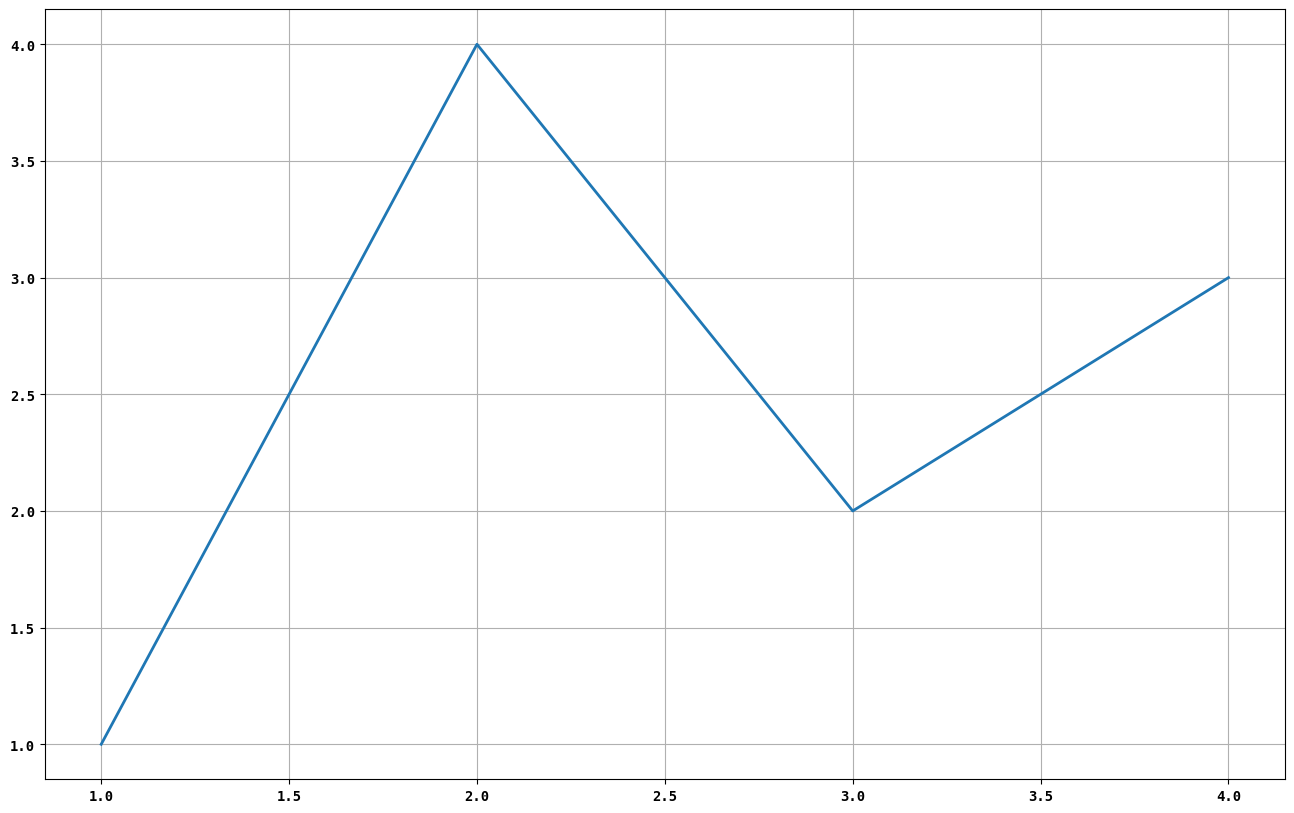

In [5]:
fig, ax = plt.subplots()  # Create a figure containing a single axes
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes

> **Note**: To display the `Figure`, you may have to call `plt.show()`, depending on your backend. For more details of Figures and backends, see the following [Matplotlib tutorial](https://matplotlib.org/stable/users/explain/figures.html#figure-explanation).

## The different parts of a Figure

Here are the different components of a Matplotlib Figure:

<!--![Parts of a Figure from Matplotlib's quick starting guide](https://matplotlib.org/stable/_images/anatomy.png)-->

<img src="https://matplotlib.org/stable/_images/anatomy.png" alt="anatomymatplotlib"
style="width: 600px; height: 600px">

### `Figure`

The `Figure` is the whole plot. It keeps track of all the child `Axes`, special Artists (titles, figure legends, colorbars, etc.), and even nested subfigures.

The easiest way to create a new Figure is with pyplot:

<Figure size 1600x1000 with 0 Axes>

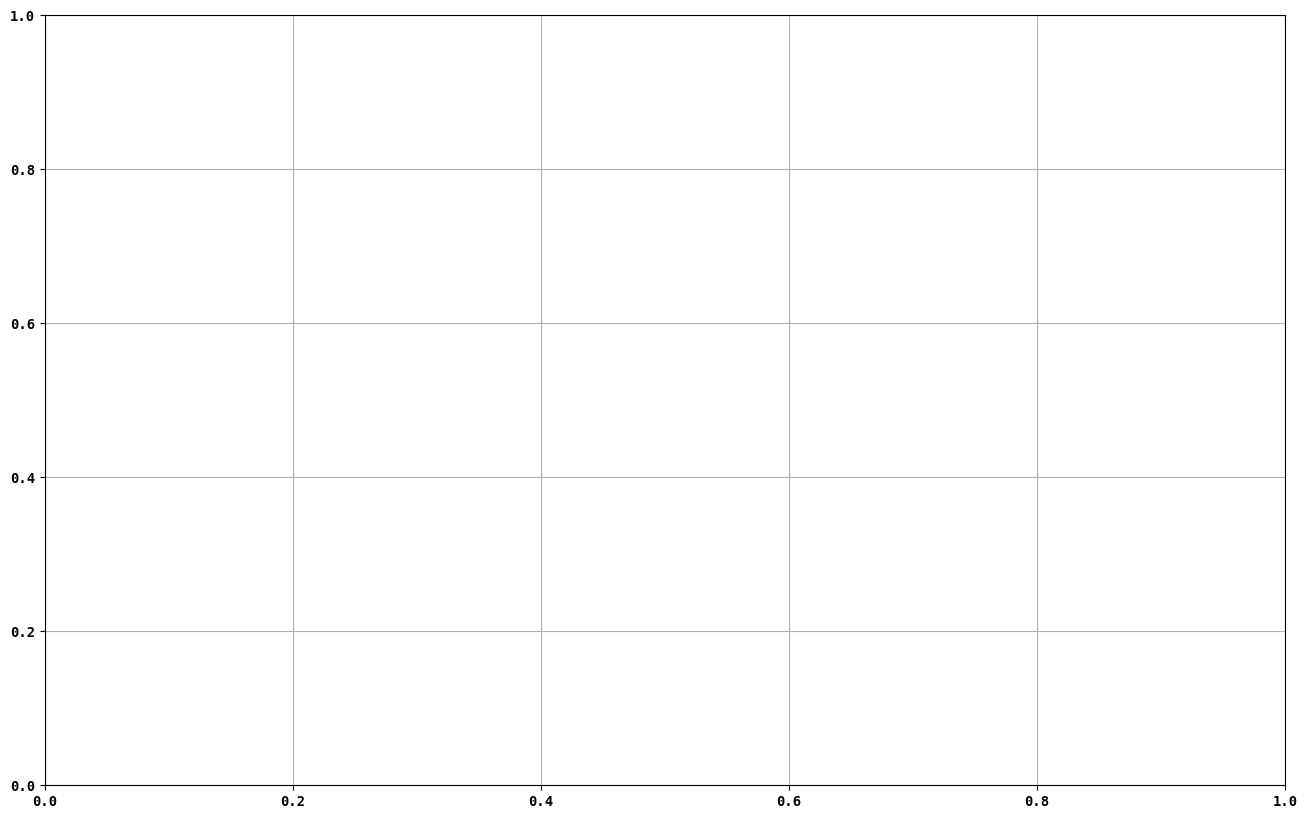

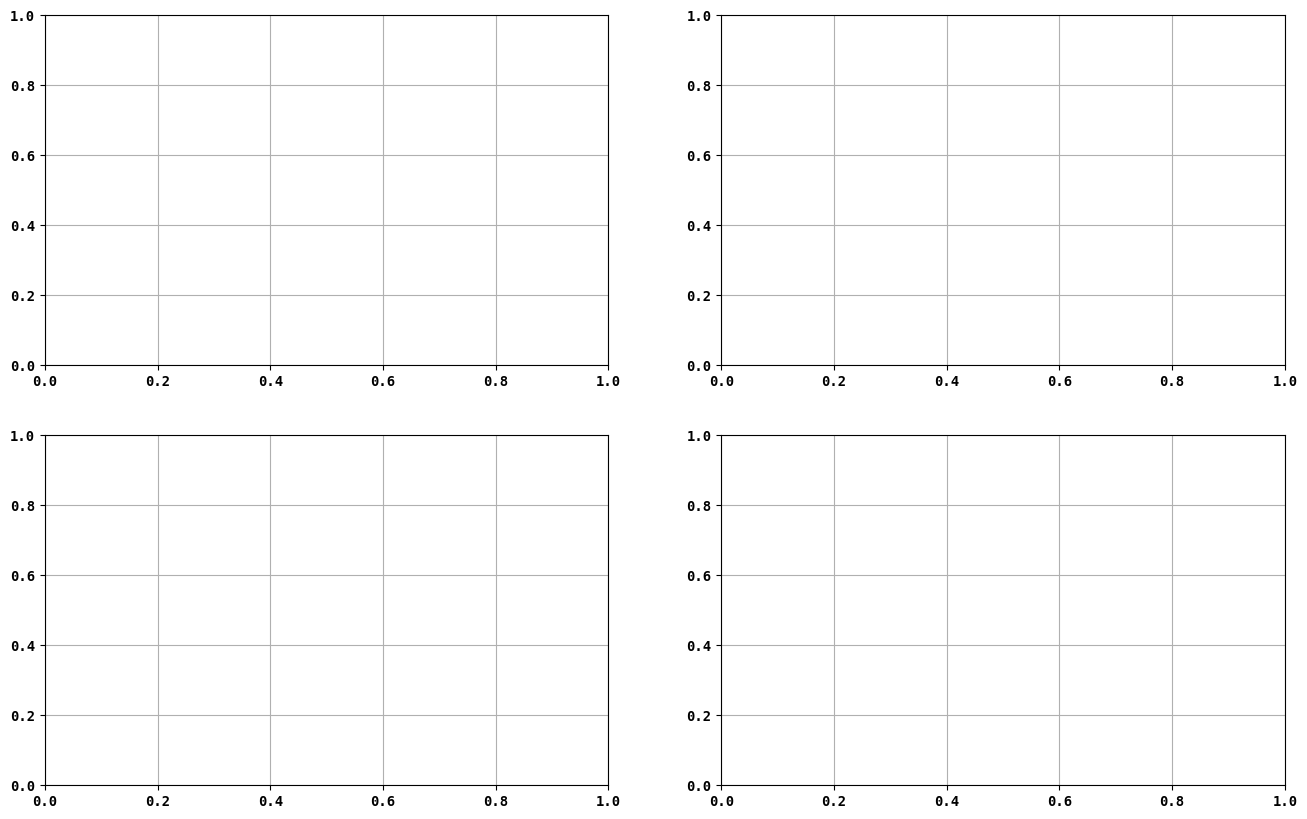

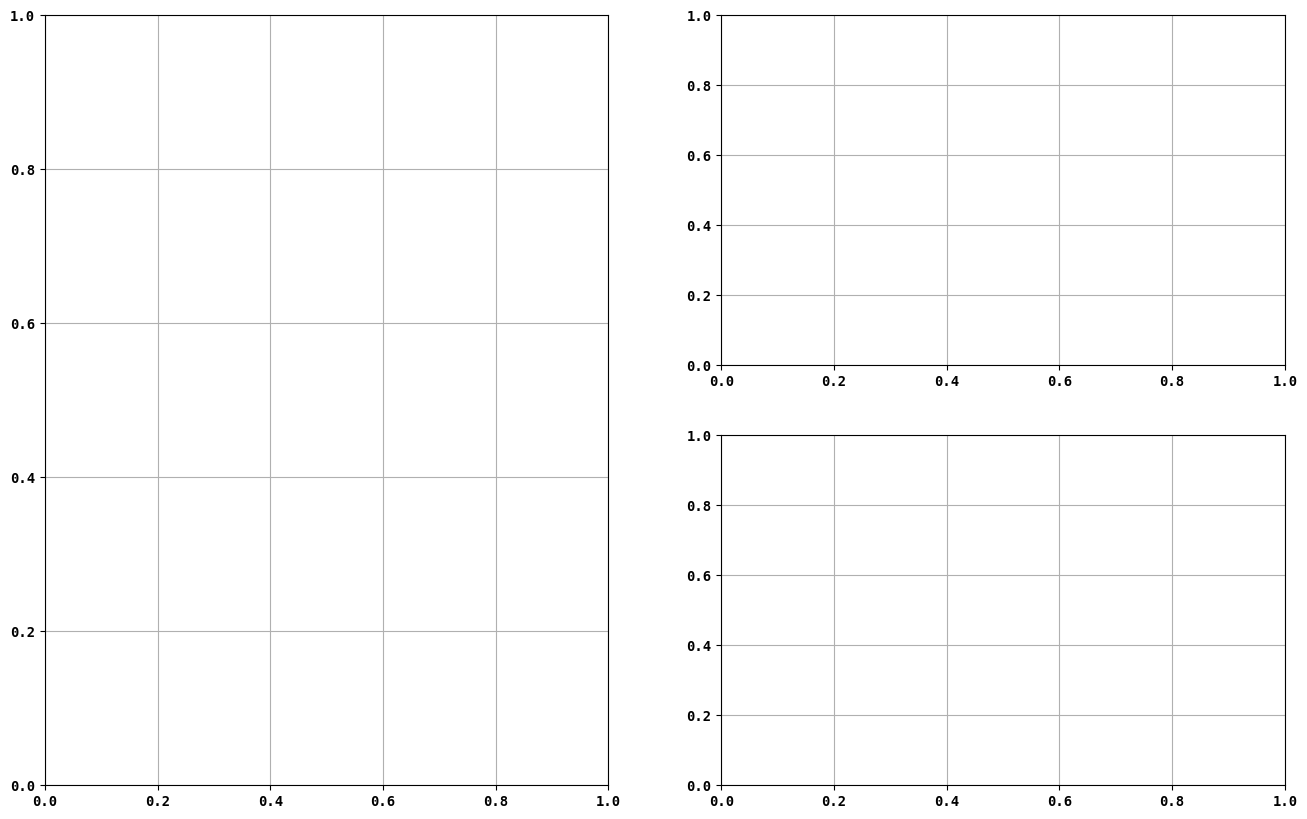

In [6]:
fig = plt.figure()  # An empty figure with no Axes
fig, ax = plt.subplots()  # A figure with single Axes
fig, axs = plt.subplots(2, 2)  # A figure with a 2x2 grid of Axes

# A figure with one axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right-top'],
                               ['left', 'right_bottom']])

You can create the Axes together with the Figure or manually add Axes later on. Many Matplotlib [backends](https://matplotlib.org/stable/users/explain/backends.html) support zooming and panning on figure windows. For more information on Figures, see [Creating, viewing, and saving Matplotlib Figures](https://matplotlib.org/stable/users/explain/figures.html#figure-explanation).

### `Axes` and `Axis`

An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) `Axis` objects that provide scales for the data in the `Axes`. Each `Axes` also has a title, x-label, and y-label that you can define respectively with `set_title()`, `set_xlabel()`, and `set_ylabel()`.

The `Axes` class and its member functions are the primary entry point to working with the Object-oriented programming (OOP) interface and have most of the plotting methods defined on them (e.g. `ax.plot()`, shown before, uses the `plot` method).

On the other hand, `Axis` objects set the scale and limits then generate ticks (the marks on the Axis) and ticklabels (strings labelling the ticks). The tick locations are determined by a `Locator` object and the ticklabel strings are formatted by a `Formatter` object.

### `Artist`

Everything visible on the Figure is an Artist (e.g. `Text` objects, `Line2D` objects, `collections` objects, `Patch` objects, etc. – even `Figure`, `Axes`, and `Axis` objects). Most Artists are tied to an Axes and cannot be shared by multiple Axes or moved from one to another.

## Types of inputs to plotting functions

Plotting functions expect `numpy.array` or `numpy.ma.masked_array` as input or even objects that can be passed to `numpy.asarray`. Objects that are similar to arrays such as pandas data objects and `numpy.matrix` may not work as intended. It's common practice to convert these to `numpy.array` objects prior to plotting. For example:

In [7]:
b = np.matrix([[3, 4], [1, 2]])
b_asarray = np.asarray(b)

> Most methods will also parse an addressable object like a _dict_, a `numpy.recarray`, or a `pandas.DataFrame`. Matplotlib allows you to provide the data keyword argument and generate plots passing the strings corresponding to the _x_ and _y_ variables.

Text(0, 0.5, 'entry b')

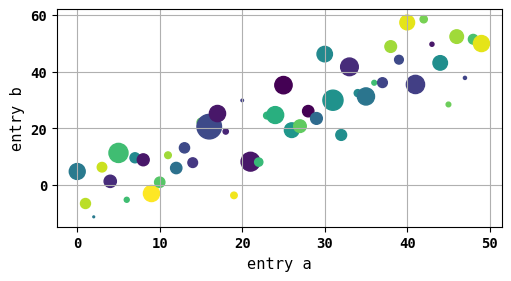

In [8]:
np.random.seed(19680801)  # Seed the random number generator
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

## Coding styles

In order to create the Figure, we use `pyplot.figure`. There are two main ways to use Matplotlib:
1. Create Figures and Axes, and call methods on them (the "object-oriented (OO) style").
2. Rely on pyplot to implicity create and manage the Figures and Axes, then use pyplot functions for plotting.

It is not easy to grasp when using Matplotlib at the first time, however, this is quite similar to MATLAB plots. We will go through the different cases and explain them one by one.

### The OO-style way of plotting

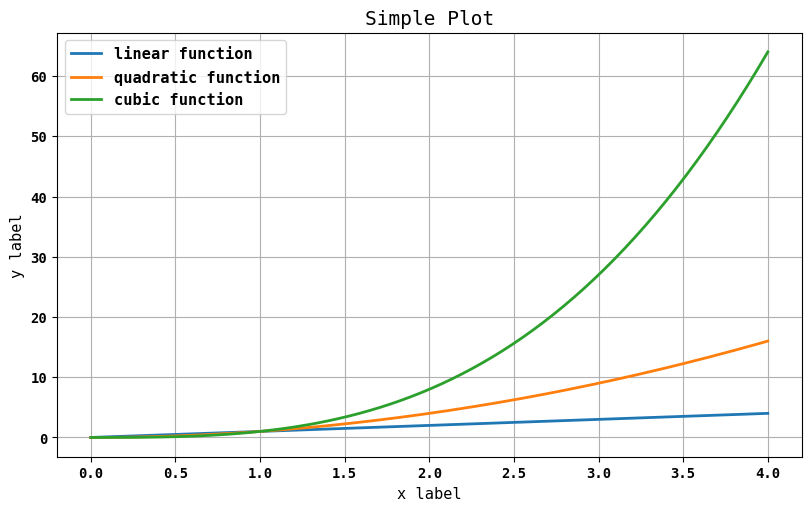

In [9]:
x = np.linspace(0, 4, 200)  # Sample data.

# OO-style
fig, ax = plt.subplots(figsize=(8, 5), layout="constrained")
ax.plot(x, x, label='linear function')  # Plot the first function.
ax.plot(x, x**2, label='quadratic function')  # Plot another function on the same graph.
ax.plot(x, x**3, label='cubic function')  # Plot a last nonlinear function on the same graph.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

### The pyplot-style way of plotting


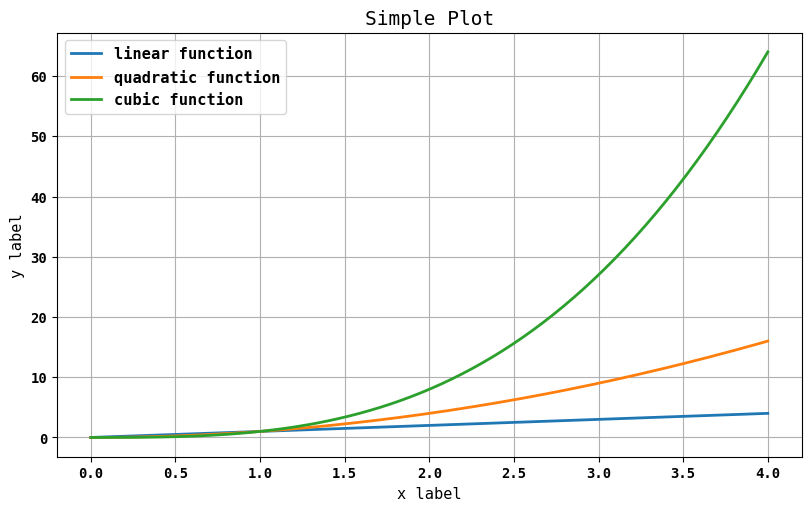

In [10]:
x = np.linspace(0, 4, 200)  # Sample data.

# pyplot-style
plt.subplots(figsize=(8, 5), layout="constrained")
plt.plot(x, x, label='linear function')  # Plot the first function.
plt.plot(x, x**2, label='quadratic function')  # Plot another function on the same graph.
plt.plot(x, x**3, label='cubic function') # Plot a last nonlinear function on the same graph.
plt.xlabel('x label')  # Add an x-label to the axes.
plt.ylabel('y label')  # Add a y-label to the axes.
plt.title("Simple Plot")  # Add a title to the axes.
plt.legend()  # Add a legend.

A third way exists in addition of the two previous methods. It completely drops pyplot, even for figure creation. More information can be found there: [Embedding Matplotlib in graphical user interfaces](https://matplotlib.org/stable/gallery/user_interfaces/index.html#user-interfaces).

Matplotlib's documentation recommends using both the OO and the pyplot styles. The OO-style is a prefered approach, especially for very complicated plots, and functions or Python scripts that are intended to be reused by other coders as part of larger project.

Pyplot is convenient for quick interactive work, which is the main goal of Jupyter Notebooks.

> There is some confusion around the relationship between pylab, pyplot and matplotlib. It's simple: matplotlib is the full library, it contains everything including pylab and pyplot.
> Pyplot provides a number of tools to plot graphs, including the state-machine interface to the underlying object-oriented plotting library.
> Pylab is a convenience module that imports `matplotlib.pyplot` and NumPy within a single namespace. You will find many examples using pylab, but it is now strongly discouraged (because _explicit_ imports are better than _implicit_ ones).

— Aurélien Géron



### Making a helper functions

If you need to create several plots or the same plots over and over again with different data sets, or want to easily wrap different Matplotlib methods, the following functions can be useful to define:

In [11]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.

    Args:
        ax (_type_): _description_
        data1 (_type_): _description_
        data2 (_type_): _description_
        param_dict (_type_): _description_
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

this function can be used directly to populate two subplots, as follows:

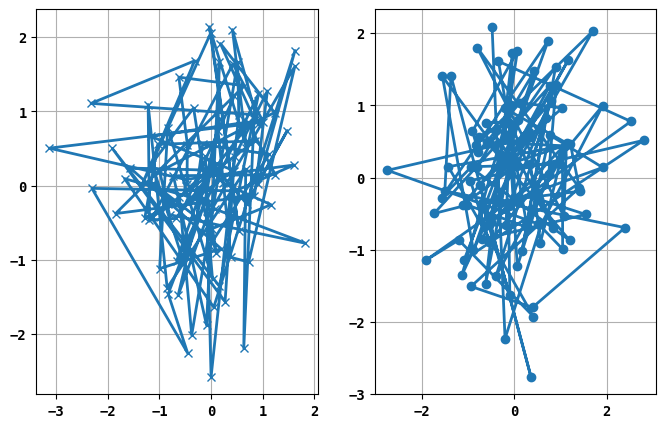

In [12]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # Make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

## Saving the figures as high-resolution PNGs for report

In [13]:
from pathlib import Path

IMAGES_PATH = Path() / "img"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig_png(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

> **Note**: You can change the function above to save your figures into another format such as `.png` or `.svg`. To do so simply replace the `fig_extension` parameter by the corresponding extension of your choice.

- [ ] To go further with [Matplotlib's plot types](https://matplotlib.org/stable/plot_types/index.html).
- [ ] For more plot types see [Plot types](https://matplotlib.org/stable/plot_types/index.html) and the [API reference](https://matplotlib.org/stable/api/index.html), in particular the [Axes API](https://matplotlib.org/stable/api/axes_api.html).

## Styling artists

Most plotting methods have styling options for the Artists (everything visible on the Figure is an Artist), accessible either when calling a plot method or from a 'setter' on the artist. In the graphic below, we manually set the _color_, _linewidth_ and _linestyle_ of the Artists created by `plot`, and we set the linestyle of the second line after the fact with `set_linestyle`.

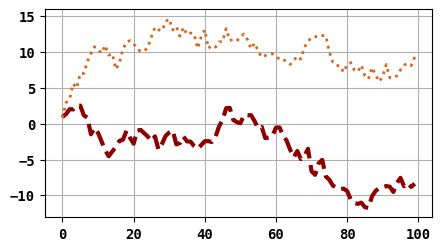

In [14]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='darkred', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='chocolate', linewidth=2)
l.set_linestyle(':')

### Colors

Matplotlib has a very flexible array of colors that are accepted for most figures; see the [colors tutorial](https://matplotlib.org/stable/tutorials/colors/colors.html) for a list of specifications (only if you need more insight and details about it). Some Artists will take multiple colors, i.e. for a `scatter` plot, the edge of the markers can be different colors from the interior:

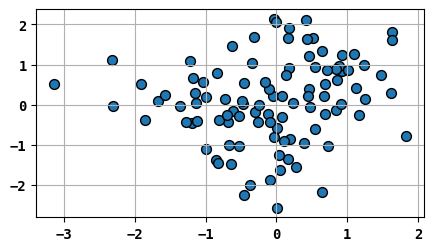

In [15]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k')

### Linewidths, linestyles, and markersizes

Line widths are typically in typographic points (1 pt = 1/72 inch) and available for Artists that have stroked lines. They can also have a linestyle (check the [linestyles example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)).

Marker size depends on the method being used: 
- `plot` specifies markersize in points, and is generally the "diameter" or width of the marker.
- `scatter` specifies markersize as approximately proportional to the visual area of the marker.
- There is an array of markerstyles available as string codes (see `markers`) or users can define their own `MarkerStyle` (see [Marker reference](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html)).

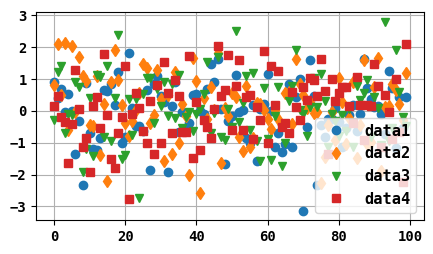

In [16]:
fix, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

## Labelling

### Axes labels and text

`set_xlabel`, `set_ylabel`, and `set_title` are used to add text in the indicated locations (see Text in [Matplotlib Plots](https://matplotlib.org/stable/tutorials/text/text_intro.html) for more discussion). Text can also be directly added to plots using `text`:

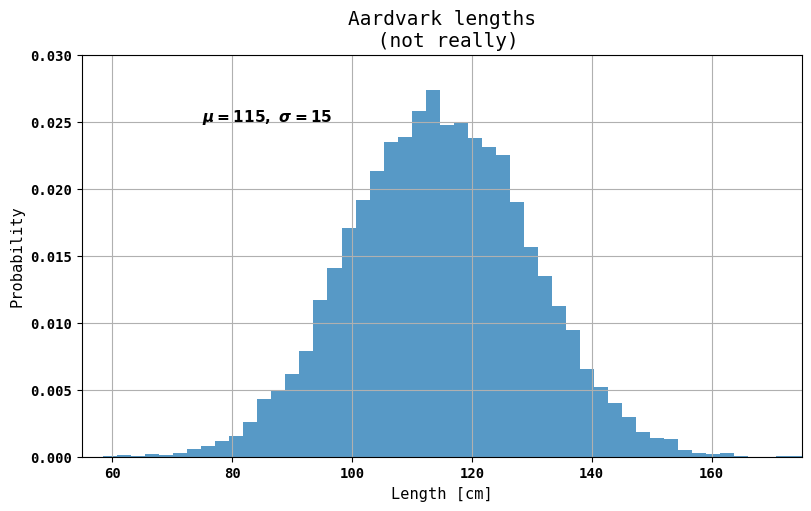

In [17]:
mu, sigma = 115, 15
x = mu + sigma*np.random.randn(10000)
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')

# The histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

In [18]:
t = ax.set_xlabel('my data', fontsize=14, color='red')

These properties are covered in more detail in [Text properties and layout](https://matplotlib.org/stable/tutorials/text/text_props.html).

### Using mathematical expressions in text

Matplotlib accepts TeX equation expressions in any text expression. For example to write the expression $\sigma_i=15$ in the title, you can write a TeX expression surrounded by dollar signs:

In [19]:
ax.set_title(r'$\sigma_i=15$')

Text(0.5, 1.0, '$\\sigma_i=15$')

where the `r` preceding the title string signifies that the string is a *raw* string and not to treat backslashes as python escapes. Matplotlib has a built-in TeX expression parser and layout engine, and ships its own math fonts – for details see [Writing mathematical expressions](https://matplotlib.org/stable/tutorials/text/mathtext.html). You can also use LaTeX directly to format your text and incorporate the output directly into your display figures or saved postscript – see [Text rendering with LaTeX](https://matplotlib.org/stable/tutorials/text/usetex.html).

### Annotations

We can also annotate points on a plot, often by connecting an arrow pointing to $xy$, to a piece of text at $xy$-text:

(-2.0, 2.0)

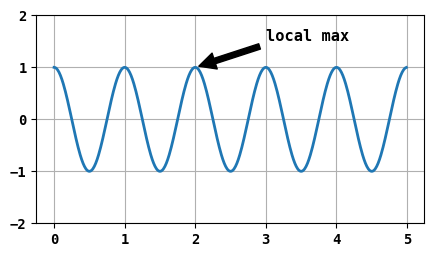

In [20]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2)

In this basic example, both xy and xytext are in data coordinates. There are a variety of other coordinate systems one can choose – see [Basic annotation](https://matplotlib.org/stable/tutorials/text/annotations.html#annotations-tutorial) and [Advanced annotation for details](https://matplotlib.org/stable/tutorials/text/annotations.html#plotting-guide-annotation). More examples also can be found in [Annotating Plots](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html).

### Legends

Often we want to identify lines or markers with a `Axes.legend`:

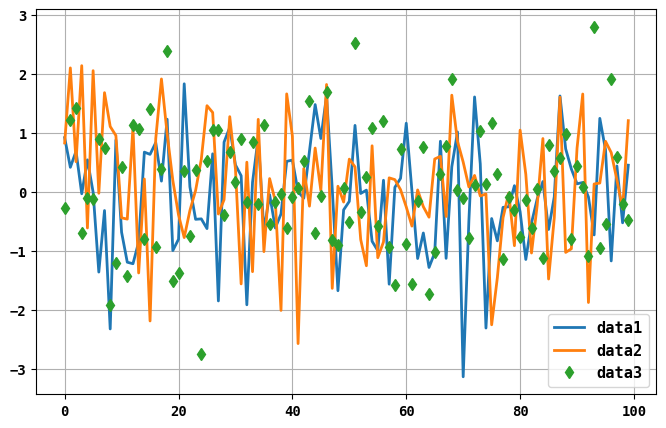

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend()

Legends in Matplotlib are quite flexible in layout, placement, and what Artists they can represent. They are discussed in detail in [Legend guide](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html).

## Axis scales and ticks

Each Axes has two (or three) `Axis` objects representing the x- and y-axis. These control the _scale_ of the Axis, the tick _locators_ and the tick _formatters_. Additional Axes can be attached to display further Axis objects.

### Scales

In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale. Since log-scales are used so much there are also direct methods like `loglog`, `semilogx`, and `semilogy`. There are a number of scales (see [Scales](https://matplotlib.org/stable/gallery/scales/scales.html) for other examples). Here we set the scale manually:

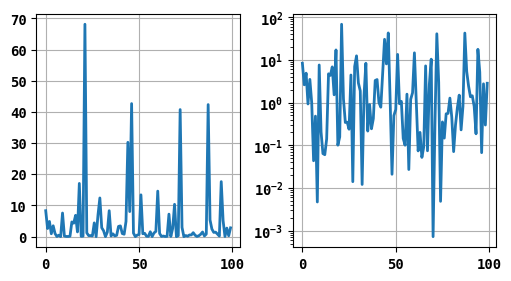

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data)

The scale sets the mapping from data values to spacing along the Axis. This happens in both directions, and gets combined into a _transform_, which is the way that Matplotlib maps from data coordinates to Axes, Figure, or screen coordinates. See [Transformations Tutorial](https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html).

### Tick locators and formatters

Each Axis has a tick _locator_ and _formatter_ that choose where along the Axis objects to put tick marks. A simple interface to this is `set_xticks`:

Text(0.5, 1.0, 'Manual ticks')

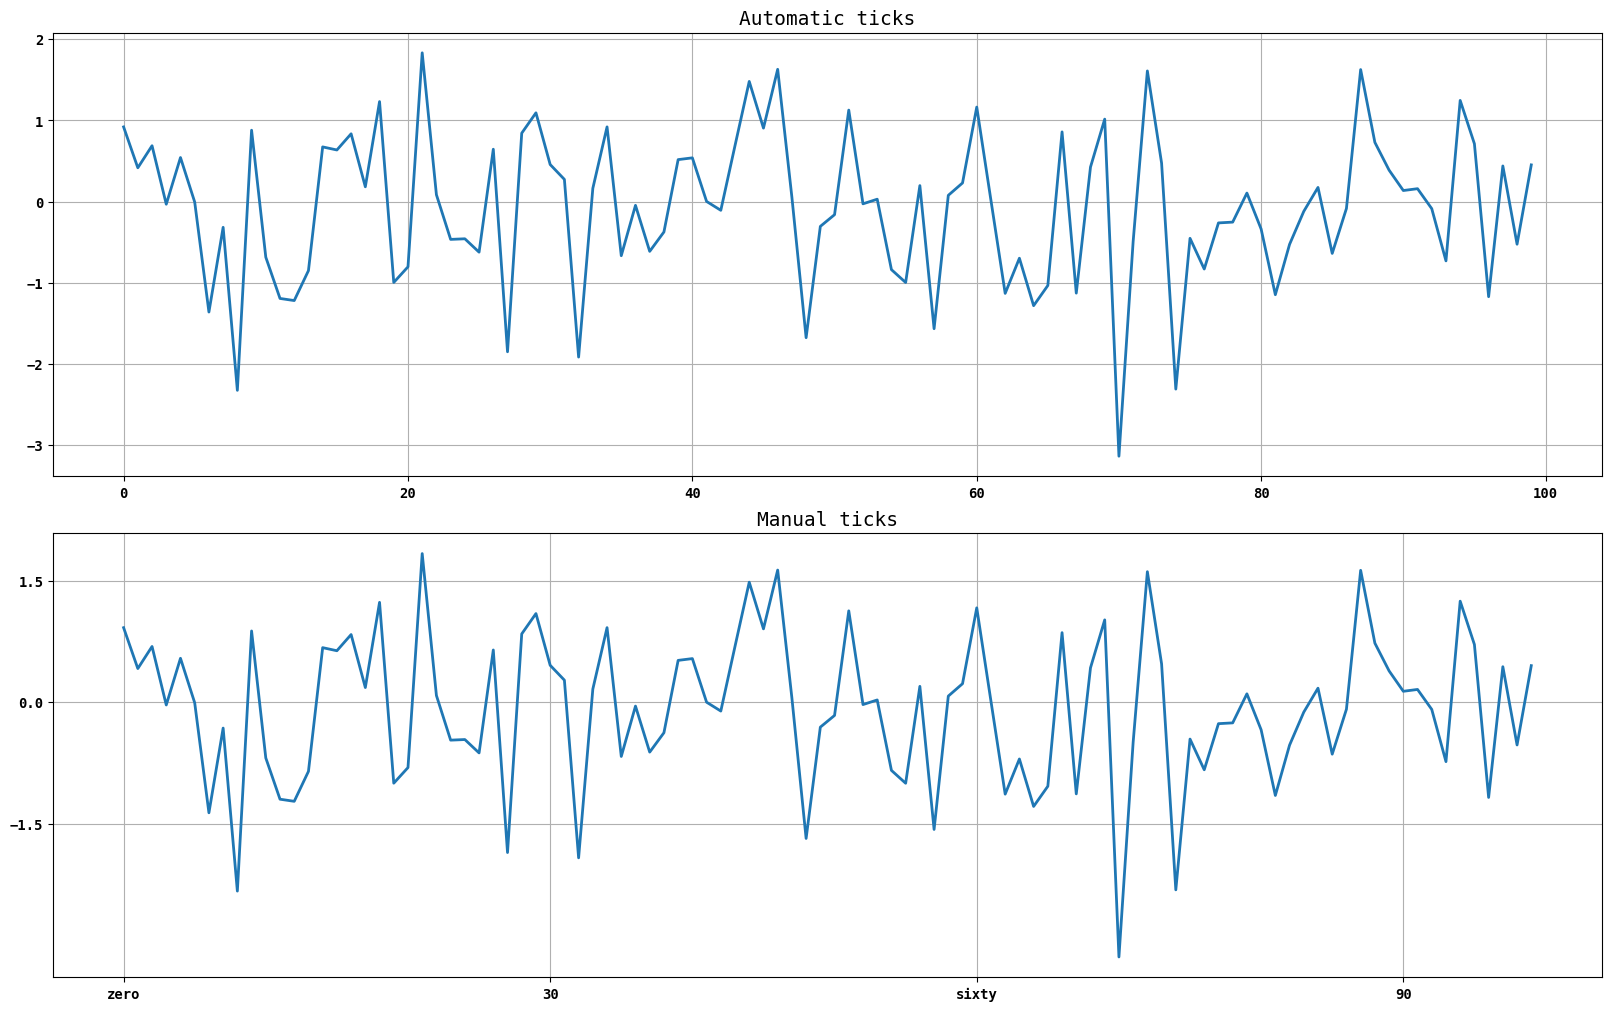

In [23]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks')

Different scales can have different locators and formatters; for instance the log-scale above uses `LogLocator` and `LogFormatter`. See [Tick locators](https://matplotlib.org/stable/gallery/ticks/tick-locators.html) and [Tick formatters](https://matplotlib.org/stable/gallery/ticks/tick-formatters.html) for other formatters and locators and information for writing your own.

### Plotting dates and strings

Matplotlib can handle plotting arrays of dates and arrays of strings, as well as floating point numbers. These get special locators and formatters as appropriate. For dates:

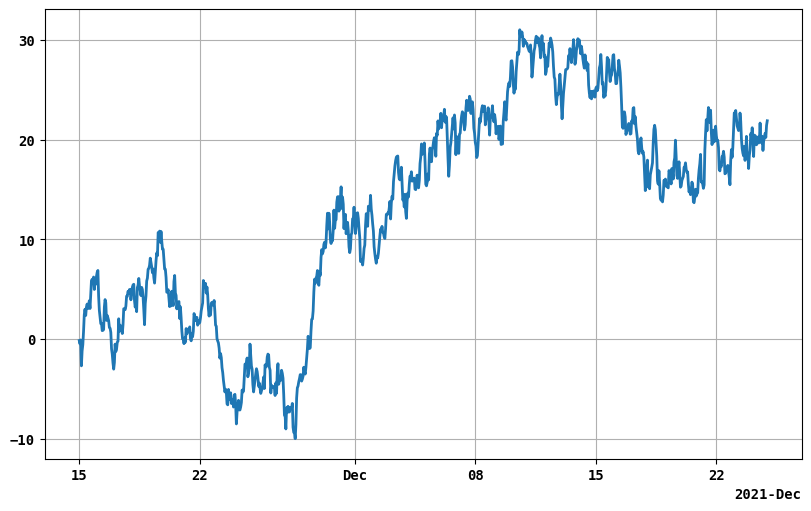

In [24]:
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

For more information see the date examples (e.g. [Date tick labels](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

For strings, we get categorical plotting (see: [Plotting categorical variables](https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html)).

<BarContainer object of 4 artists>

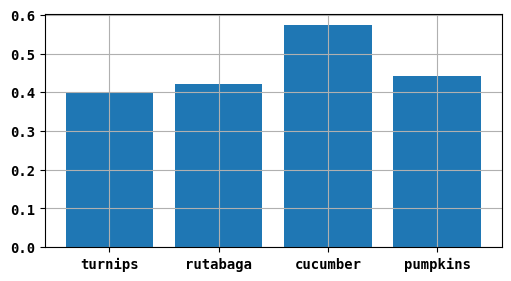

In [25]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)))

One caveat about categorical plotting is that some methods of parsing text files return a list of strings, even if the strings all represent numbers or dates. If you pass 1000 strings, Matplotlib will think you meant 1000 categories and will add 1000 ticks to your plot!

### Additional axis objects

Plotting data of different magnitude in one chart may require an additional y-axis. Such an Axis can be created by using `twinx` to add a new Axes with an invisible x-axis and a y-axis positioned at the right (analogously for `twiny`). See [Plots with different scales](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html) for another example.

Similarly, you can add a `secondary_xaxis` or `secondary_yaxis` having a different scale than the main Axis to represent the data in different scales or units. See [Secondary Axis](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html) for further examples.

Text(0.5, 0, 'Angle [°]')

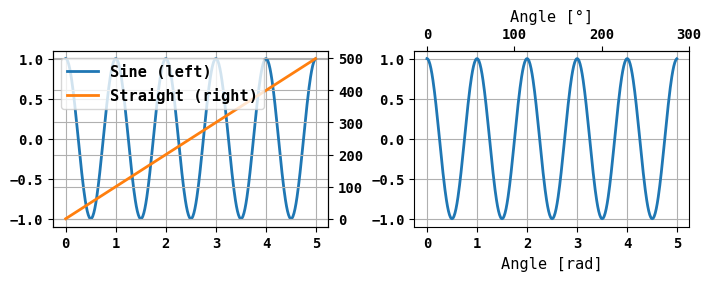

In [26]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

## Color mapped data

Often we want to have a third dimension in a plot represented by a colors in a colormap. Matplotlib has a number of plot types that do this:

Text(0.5, 1.0, 'scatter()')

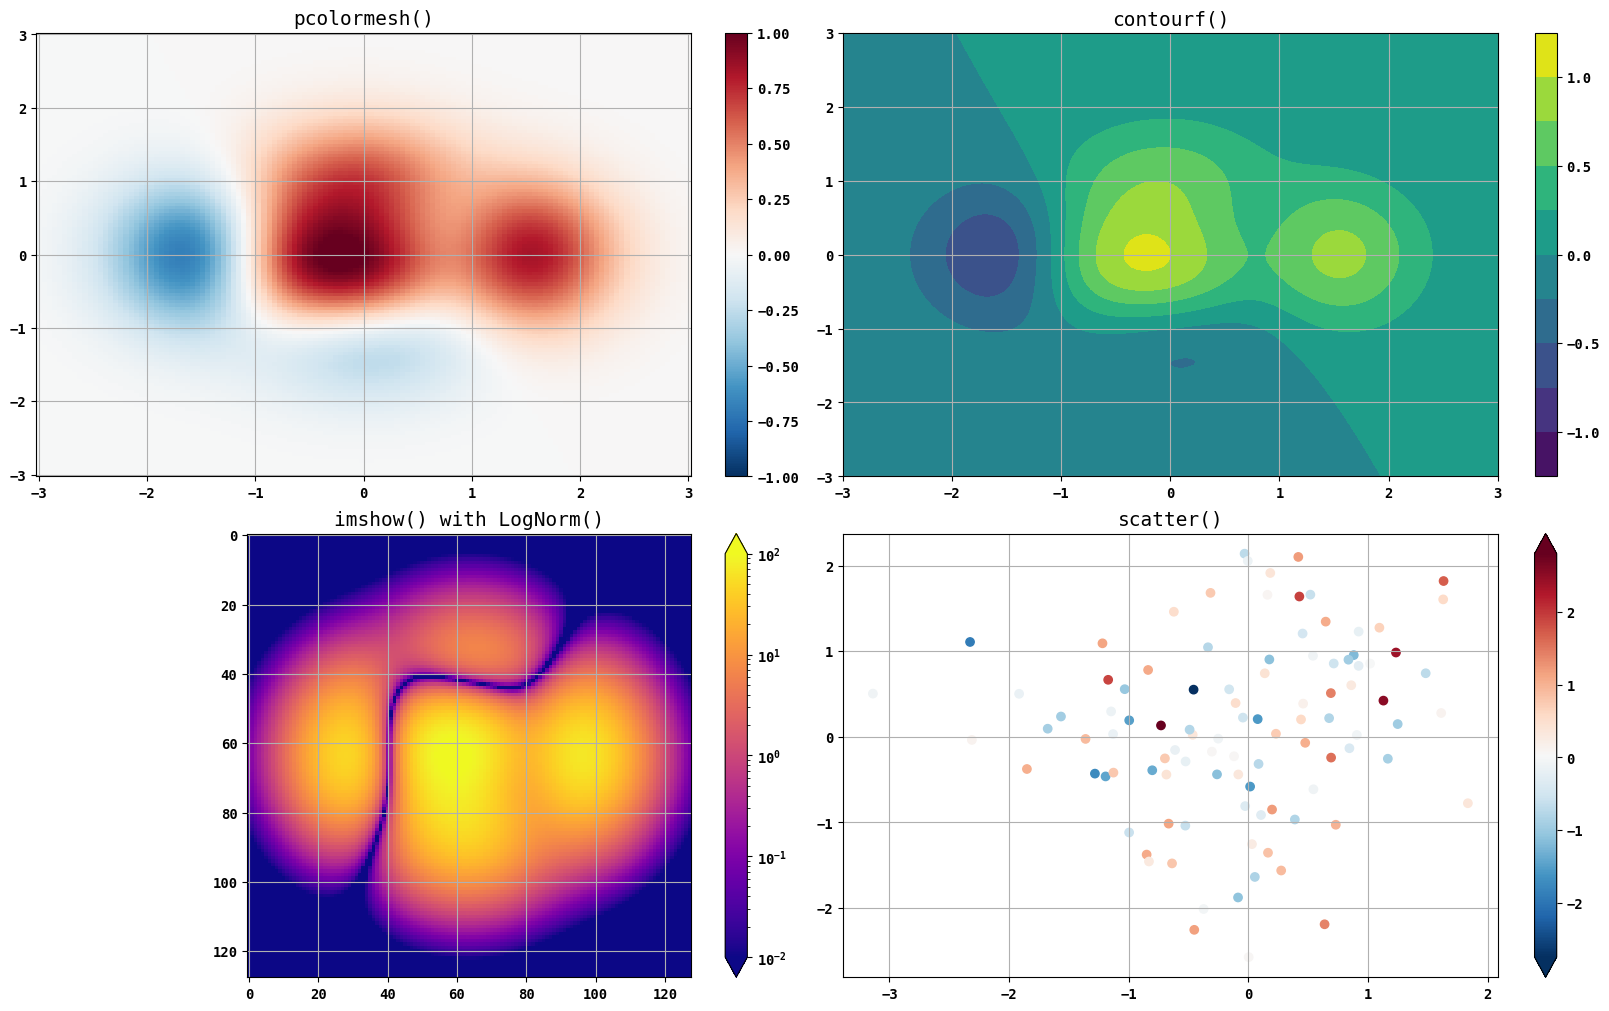

In [27]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

### Colormaps

These are all examples of Artists that derive from `ScalarMappable` objects. They all can set a linear mapping between _vmin_ and _vmax_ into the colormap specified by _cmap_. Matplotlib has many colormaps to choose from ([Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)) you can make your own ([Creating Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html)) or download as [third-party packages](https://matplotlib.org/mpl-third-party/#colormaps-and-styles).

### Normalizations

Sometimes we want a non-linear mapping of the data to the colormap, as in the `LogNorm` example above. We do this by supplying the ScalarMappable with the *norm* argument instead of *vmin* and *vmax*. More normalizations are shown at [Colormap Normalization](https://matplotlib.org/stable/tutorials/colors/colormapnorms.html).

### Colorbars

Adding a `colorbar` gives a key to relate the color back to the underlying data. Colorbars are figure-level Artists, and are attached to a ScalarMappable (where they get their information about the norm and colormap) and usually steal space from a parent Axes. 

Placement of colorbars can be complex: see [Placing Colorbars](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/colorbar_placement.html) for details. 

You can also change the appearance of colorbars with the *extend* keyword to add arrows to the ends, and *shrink* and *aspect* to control the size. Finally, the colorbar will have default locators and formatters appropriate to the norm. These can be changed as for other Axis objects.

## Working with multiple figures and axes

You can open multiple Figures with multiple calls to `fig = plt.figure()` or `fig2, ax = plt.subplots()`. By keeping the object references you can add Artists to either Figure.

Multiple Axes can be added a number of ways, but the most basic is `plt.subplots()` as used above. One can achieve more complex layouts, with Axes objects spanning columns or rows, using `subplot_mosaic`.

Text(0.5, 1.0, 'right')

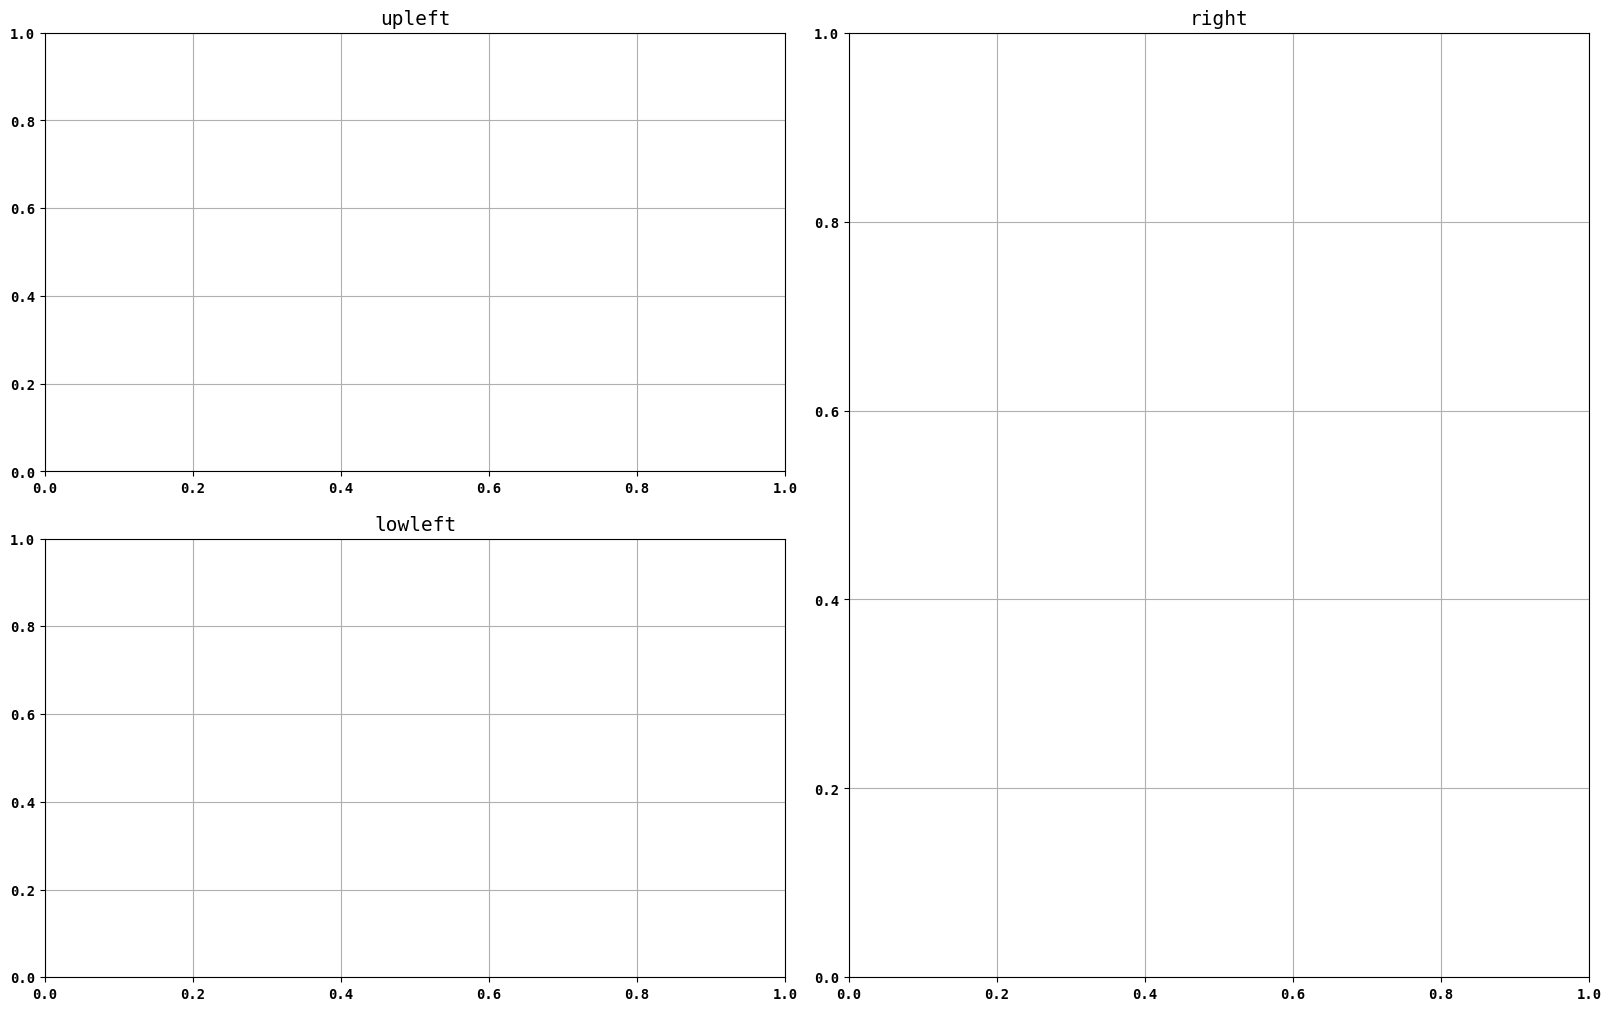

In [28]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')

Matplotlib has quite sophisticated tools for arranging Axes: See [Arranging multiple Axes in a Figure](https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html) and [Complex and semantic figure composition (subplot_mosaic)](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/mosaic.html).

## More readings

For more plot types see [Plot types](https://matplotlib.org/stable/plot_types/index.html) and the [API reference](https://matplotlib.org/stable/api/index.html), in particular the [Axes API](https://matplotlib.org/stable/api/axes_api.html).

## References for Matplotlib

If you want to get more insights and learn more about Matplotlib, please visit the following two very good references:

- [Matplotlib's Quick Start Guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)
- [Matplotlib's Cheatsheet](https://matplotlib.org/cheatsheets/)